In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from simulate_groups import (
    simulate_groups,
    simulate_cov_groups,
    simulate_ll
)

%load_ext autoreload
%autoreload 2

### Simulate data with block covariance structure

Text(0.5, 1, 'Covariance matrix')

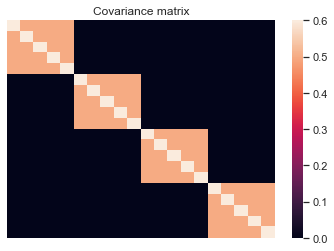

In [2]:
sigma_1, _ = simulate_groups(20, 4)

sns.set()
sns.heatmap(sigma_1)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Covariance matrix')

In [3]:
n = 1000
p = sigma_1.shape[0]

# sample some data from MVN with the given covariance matrix
X = np.random.multivariate_normal(mean=np.zeros(p),
                                  cov=sigma_1,
                                  size=(n,),
                                  check_valid='warn')

# calculate covariance/precision matrix from data
sigma_hat = np.cov(X, rowvar=False)
theta_hat = np.linalg.inv(sigma_hat)

Text(0.5, 1, 'Covariance estimated from data')

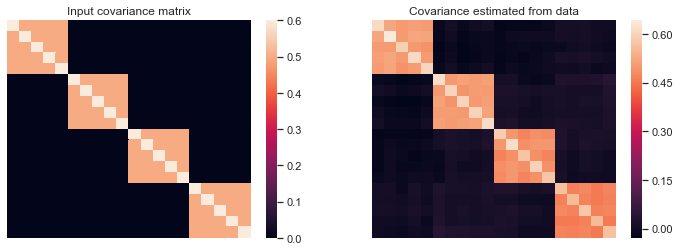

In [4]:
sns.set({'figure.figsize': (12, 4)})
fig, axarr = plt.subplots(1, 2)

# high/low diagonal values can skew the plot, so just bound them
sigma_1[sigma_1 > 1] = 1
sigma_1[sigma_1 < 0] = 0
sigma_hat[sigma_hat > 1] = 1
theta_hat[sigma_hat < 0] = 0

sns.heatmap(sigma_1, ax=axarr[0])
axarr[0].get_xaxis().set_visible(False)
axarr[0].get_yaxis().set_visible(False)
axarr[0].set_title('Input covariance matrix')
sns.heatmap(sigma_hat, ax=axarr[1])
axarr[1].get_xaxis().set_visible(False)
axarr[1].get_yaxis().set_visible(False)
axarr[1].set_title('Covariance estimated from data')

### Simulate labels from data

In [5]:
X, y, info_dict = simulate_ll(n=10,
                              p=20,
                              uncorr_frac=0.1,
                              num_groups=5,
                              group_sparsity=0.5,
                              seed=1)
print(X[:5, :5])

[[-1.47816766 -1.17570656 -0.56630148 -1.48762442  0.33547538]
 [-0.26205586 -0.05587172 -0.02080083  0.21638135  0.61364603]
 [ 0.71310067  1.00108528  0.29241222  1.23167487 -1.51553243]
 [-0.23108802  0.67125536  0.09953118  0.06573449 -1.00338809]
 [-0.01255777 -0.11969667 -0.25747886 -0.07409819 -0.19533712]]


In [6]:
print(np.count_nonzero(y) / y.shape[0])
print(y)

0.4
[0 0 1 1 1 0 0 0 0 1]


In [7]:
print({k: v for k, v in info_dict.items() if k != 'sigma'})

{'betas': array([-0.2361257 , -0.2361257 , -0.2361257 , -0.2361257 , -1.70671527,
       -1.70671527, -1.70671527, -1.70671527,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -1.27771126]), 'pis': array([[5.84862924e-02],
       [1.23793908e-03],
       [9.97908775e-01],
       [9.38738636e-01],
       [5.97030966e-01],
       [9.00043657e-02],
       [2.60651157e-04],
       [2.24672408e-03],
       [3.70418189e-01],
       [7.92840710e-01]]), 'groups': [array([0, 1, 2, 3]), array([4, 5, 6, 7]), array([ 8,  9, 10, 11]), array([12, 13, 14]), array([15, 16, 17])], 'is_correlated': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False])}


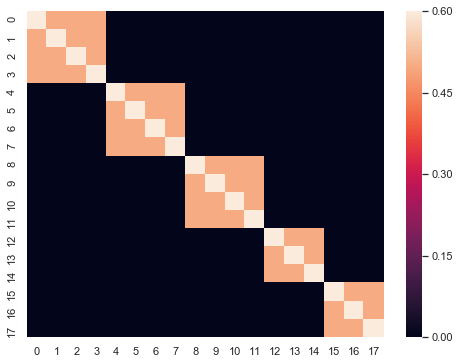

In [8]:
sns.set({'figure.figsize': (8, 6)})
sns.heatmap(info_dict['sigma'])